Тема “Обучение без учителя”
Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [63]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [2]:
feature_names = boston["feature_names"]
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
data = boston["data"]
 = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [87]:
target = boston["target"]
y = pd.DataFrame(target, columns=["price"])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [164]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [165]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne_scaled = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne_scaled.shape))

До:	(404, 13)
После:	(404, 2)


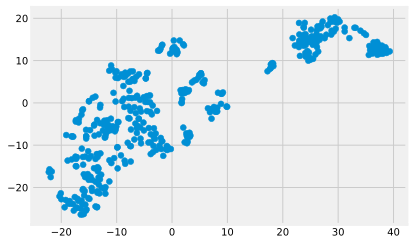

In [166]:
plt.scatter(X_train_tsne_scaled[:, 0], X_train_tsne_scaled[:, 1])

plt.show()

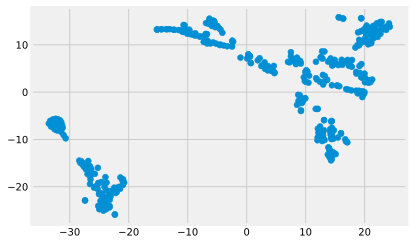

In [167]:
X_train_tsne_not_scaled = tsne.fit_transform(X_train)
plt.scatter(X_train_tsne_not_scaled[:, 0], X_train_tsne_not_scaled[:, 1])

plt.show()

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


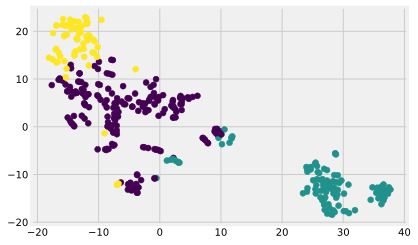

In [219]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train_scaled = kmeans.fit_predict(X_train_scaled)
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train_scaled)

plt.show()

In [220]:
print('Кластер 0 price: {}'.format(y_train[labels_train_scaled == 0].mean().tolist()[0]))
print('Кластер 1 price: {}'.format(y_train[labels_train_scaled == 1].mean().tolist()[0]))
print('Кластер 2 price: {}'.format(y_train[labels_train_scaled == 2].mean().tolist()[0]))
print('Кластер 0 CRIM: {}'.format(X_train.loc[labels_train_scaled == 0, 'CRIM'].mean()))
print('Кластер 1 CRIM: {}'.format(X_train.loc[labels_train_scaled == 1, 'CRIM'].mean()))
print('Кластер 2 CRIM: {}'.format(X_train.loc[labels_train_scaled == 2, 'CRIM'].mean()))

Кластер 0 price: 24.069354838709685
Кластер 1 price: 15.840776699029128
Кластер 2 price: 29.08307692307692
Кластер 0 CRIM: 0.3875606989247312
Кластер 1 CRIM: 10.58695514563107
Кластер 2 CRIM: 0.07012230769230769


*Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


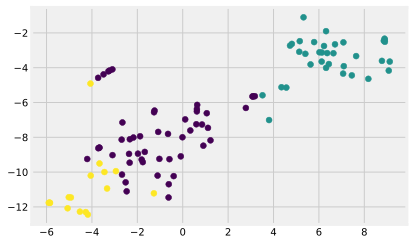

In [202]:

labels_test_scaled = kmeans.predict(X_test_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test_scaled)

plt.show()


In [203]:
print('Кластер 0 price: {}'.format(y_test[labels_test_scaled == 0].mean().tolist()[0]))
print('Кластер 1 price: {}'.format(y_test[labels_test_scaled == 1].mean().tolist()[0]))
print('Кластер 2 price: {}'.format(y_test[labels_test_scaled == 2].mean().tolist()[0]))
print('Кластер 0 CRIM: {}'.format(X_test.loc[labels_test_scaled == 0, 'CRIM'].mean()))
print('Кластер 1 CRIM: {}'.format(X_test.loc[labels_test_scaled == 1, 'CRIM'].mean()))
print('Кластер 2 CRIM: {}'.format(X_test.loc[labels_test_scaled == 2, 'CRIM'].mean()))


Кластер 0 price: 21.860784313725492
Кластер 1 price: 16.437142857142856
Кластер 2 price: 31.35
Кластер 0 CRIM: 0.26607882352941176
Кластер 1 CRIM: 10.165531142857143
Кластер 2 CRIM: 0.062060000000000004


In [204]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

y_test_pred = lr.predict(X_test_scaled)

r2_score(y_test, y_test_pred)

0.668759493535632

In [205]:
lr.fit(X_train_scaled.loc[labels_train_scaled == 0], y_train[labels_train_scaled == 0])

y_test_pred_0 = lr.predict(X_test_scaled.loc[labels_test_scaled == 0])

r2_score(y_test[labels_test_scaled == 0], y_test_pred_0)

0.7215240423132003

In [206]:
lr.fit(X_train_scaled.loc[labels_train_scaled == 1], y_train[labels_train_scaled == 1])

y_test_pred_1 = lr.predict(X_test_scaled.loc[labels_test_scaled == 1])

r2_score(y_test[labels_test_scaled == 1], y_test_pred_1)

0.5231457727131807

In [207]:
lr.fit(X_train_scaled.loc[labels_train_scaled == 2], y_train[labels_train_scaled == 2])

y_test_pred_2 = lr.predict(X_test_scaled.loc[labels_test_scaled == 2])

r2_score(y_test[labels_test_scaled == 2], y_test_pred_2)

0.9155161972050826

In [209]:
print(y_test[labels_test_scaled == 1].shape)
print(y_test[labels_test_scaled == 0].shape)
print(y_test[labels_test_scaled == 2].shape)

(35, 1)
(51, 1)
(16, 1)


До:	(354, 13)
После:	(354, 2)


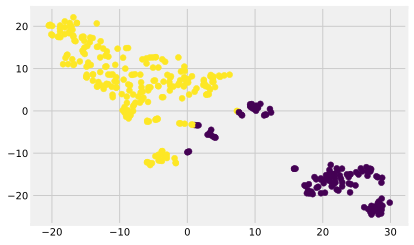

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
tsne = TSNE(n_components=2, learning_rate=150, random_state=100)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))
kmeans = KMeans(n_clusters=2)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [212]:
labels_test = kmeans.predict(X_test_scaled)

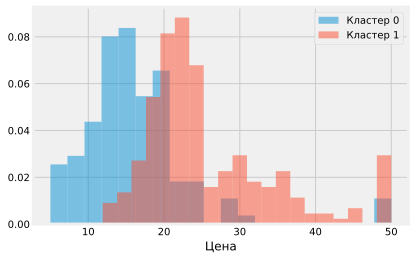

In [213]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('Цена')

plt.show()

In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

y_test_pred = lr.predict(X_test_scaled)

r2_score(y_test, y_test_pred)

0.6508417720329545

In [215]:
lr.fit(X_train_scaled.loc[labels_train == 0], y_train[labels_train == 0])

y_test_pred_0 = lr.predict(X_test_scaled.loc[labels_test == 0])

r2_score(y_test[labels_test == 0], y_test_pred_0)

0.6458127429551195

In [216]:
lr.fit(X_train_scaled.loc[labels_train == 1], y_train[labels_train == 1])

y_test_pred_1 = lr.predict(X_test_scaled.loc[labels_test == 1])

r2_score(y_test[labels_test == 1], y_test_pred_1)

0.831603433529844

In [217]:
y_test_all = np.hstack([y_test[labels_test == 0], y_test[labels_test == 1]])
y_test_pred_all = np.hstack([y_test_pred_0, y_test_pred_1])

r2_score(y_test_all, y_test_pred_all)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 55 and the array at index 1 has size 97